Implement a simulator environment for a vacuum-cleaner world and a set of intelligent agents.

PEAS description Intelligent Agents: Vacuum-cleaner World

Implement a simulator environment for a vacuum-cleaner world and a set of intelligent agents.

## PEAS description

__Performance Measure:__ Each action costs 1. The performance is measured as the sum of the cost to clean the whole environment.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size of the layout of the room (i.e., it knows n and where it starts).

__Actuators:__ The agent can `clean` the current square or move to an adjacent square by going `north`, `east`, `west`, or `south`.

__Sensors:__ Four bumper sensors, one for `north`, `east`, `west`, and `south`; a dirt sensor reporting dirt in the current square.  

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached.

## Define the agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictonary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`; not specified bumpers are assumed to be `False`. E.g., if the agent is on the north-west corner, `bumpers` gets `{"north" : True, "west" : True}` or if the agent is not close to a border then it gets `{}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
from numpy import random

actions = ["north", "east", "west", "south", "suck"]


def simple_randomized_agent(bumpers, dirty):
    return random.choice(actions)

In [2]:
simple_randomized_agent({"north" : True}, True)

'south'

Run the agent 10 times steps.

In [3]:
for i in range(10):
    print(simple_randomized_agent({}, True))

north
south
east
south
north
south
north
north
west
south


## My helpers

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def show_room(room, pos, fontsize = 24):  
    """display room and robot
    
    Parameters
    ----------
    room : bool 2d array
        Dirt locations in the room.
    pos : list of 2 int values
        x and y location of the robot.
    fint_size : int
        size of the robot symbol.
    """
    
    cmap = colors.ListedColormap(['white', 'gray'])
    
    room = np.copy(room)    
    room = room.astype(np.int64)
    
    fig, ax = plt.subplots()
    ax.imshow(room, cmap = cmap, norm = colors.BoundaryNorm(list(range(cmap.N+1)), cmap.N))
    
    plt.text(pos[1], pos[0], u"\u2B24", fontsize = fontsize,
                 horizontalalignment = 'center', verticalalignment = 'center')
    
    plt.show()

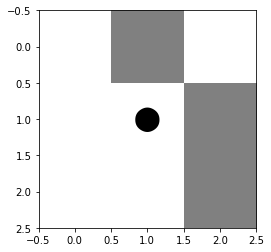

In [5]:
room = [[False, True, False], 
    [False, False, True],
    [False, False, True]]
pos = [1,1]

show_room(room, pos)

# Tasks


## Task 1: Implement a simulation environment

Your environment simulator needs to create squares, make some dirty, and provide the agent function with the sensor inputs. The environment needs to evaluate the performance measure. It needs to track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

*Note:* This implementation starts at position 0/0 instead of a random position!

The simulation environment needs to work with the simple randomized agent program from above.

room with 4 dirty squares:
[[False False False False  True]
 [False  True False False False]
 [False False False False False]
 [False  True False False False]
 [False False  True False False]]

start simulation
-------------------------------------------------- 

step: 1


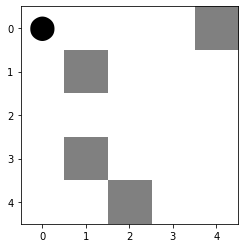

current position: [0, 0]
percepts: bumpers={'north': True, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  east
dirty squares left: 4
-------------------------------------------------- 

step: 2


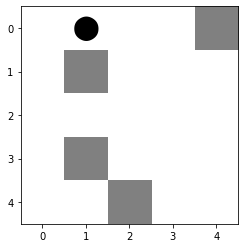

current position: [0, 1]
percepts: bumpers={'north': True, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  north
dirty squares left: 4
-------------------------------------------------- 

step: 3


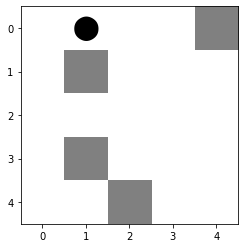

current position: [0, 1]
percepts: bumpers={'north': True, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  suck
dirty squares left: 4
-------------------------------------------------- 

step: 4


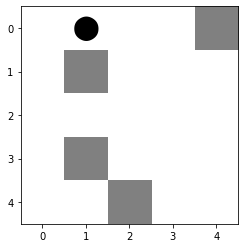

current position: [0, 1]
percepts: bumpers={'north': True, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  east
dirty squares left: 4
-------------------------------------------------- 

step: 5


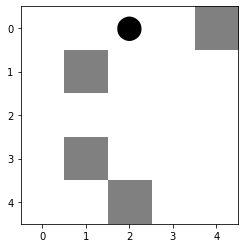

current position: [0, 2]
percepts: bumpers={'north': True, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  east
dirty squares left: 4
-------------------------------------------------- 

step: 6


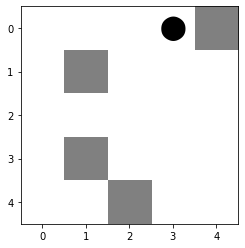

current position: [0, 3]
percepts: bumpers={'north': True, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 4
-------------------------------------------------- 

step: 7


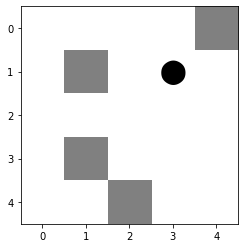

current position: [1, 3]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  west
dirty squares left: 4
-------------------------------------------------- 

step: 8


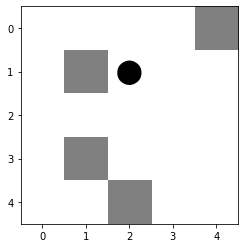

current position: [1, 2]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  suck
dirty squares left: 4
-------------------------------------------------- 

step: 9


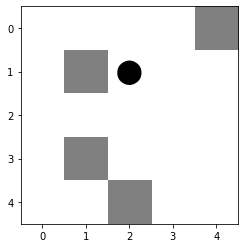

current position: [1, 2]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  suck
dirty squares left: 4
-------------------------------------------------- 

step: 10


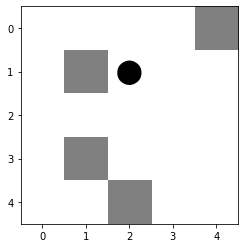

current position: [1, 2]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 4


10

In [6]:
import numpy as np

def vacuum_environment(agent, n = 5, p = .2, maxsteps = 10000, verb = True):  
    
    # initialize room
    room = np.random.choice(a=[True, False], size=(n, n), p=[p, 1-p]) 
    to_clean = np.sum(room)
    if verb: 
        print(f"room with {to_clean} dirty squares:\n{room}")
    
    # initialize position (could be random)
    pos = [0, 0] # north/west corner
    
    if verb: 
        print("\nstart simulation")
    for step in range(1, maxsteps+1):
       
        # prepare percepts
        bumpers = {
            "north": pos[0] == 0,
            "south": pos[0] == n-1,
            "west" : pos[1] == 0,
            "east" : pos[1] == n-1
                  }
        dirty = room[pos[0], pos[1]]
        
        if verb: 
            print('-' * 50, "\n")
            print(f"step: {step}")
            show_room(room, pos) 
            print(f"current position: {pos}")
            print(f"percepts: bumpers={bumpers}, dirty={dirty}")
            
        # call agent program
        action = agent(bumpers, dirty)
        if verb: 
            print("agent's action: ", action)
        
        # apply action to the environment
        if action == "north" and pos[0]>0:     pos[0] = pos[0]-1
        if action == "south" and pos[0]<(n-1): pos[0] = pos[0]+1  
        if action == "west"  and pos[1]>0:     pos[1] = pos[1]-1
        if action == "east"  and pos[1]<(n-1): pos[1] = pos[1]+1
        if action == "suck":                   room[pos[0], pos[1]] = False
        
        # check for goal state and return performance measure
        to_clean = np.sum(room)
        if verb: 
            print(f"dirty squares left: {to_clean}")
            
        if to_clean < 1: 
            break
            
    # number of steps is the performance measure (step starts at 0 not 1)
    return step
            
vacuum_environment(simple_randomized_agent, maxsteps = 10)

In [7]:
vacuum_environment(simple_randomized_agent, verb = False)

506

I run 100 simulation runs, calculate the average number of steps and plot a histogram.

steps for first 10 runs: [897, 503, 121, 1273, 621, 192, 1067, 439, 849, 163]
mean steps: 441.68


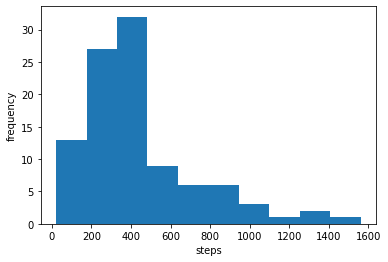

In [8]:
np.random.seed(1234)

N = 100 # simulation runs

steps = [ vacuum_environment(simple_randomized_agent, verb = False) for _ in range(N) ]

print("steps for first 10 runs:", steps[0:10])
print("mean steps:", np.mean(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

I have realized that the robot often drives over dirty squares, but does not clean them be cause the cahnve for sucking is low. I wonder if I can improve the performance by increasing the probability of sucking. I experimented with different probabilities. Note: a line search for the probability would be helpful to find the best value.

In [9]:
def simple_randomized_agent_sucker(bumpers, dirty):
    p_suck = .4
    
    return random.choice(actions, p = [(1-p_suck)/4, (1-p_suck)/4, (1-p_suck)/4, (1-p_suck)/4, p_suck])

mean steps: 328.11


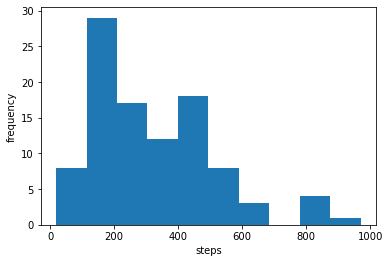

In [10]:
np.random.seed(1234)

steps = [ vacuum_environment(simple_randomized_agent_sucker, verb = False) for _ in range(N) ]

print("mean steps:", np.mean(steps))

plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

## Task 2:  Implement a simple reflex agent

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking.

room with 8 dirty squares:
[[False  True False False  True]
 [ True  True False False  True]
 [False False  True  True  True]
 [False False False False False]
 [False False False False False]]

start simulation
-------------------------------------------------- 

step: 1


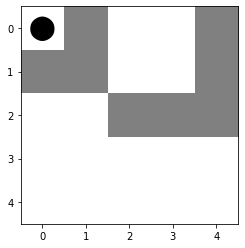

current position: [0, 0]
percepts: bumpers={'north': True, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  east
dirty squares left: 8
-------------------------------------------------- 

step: 2


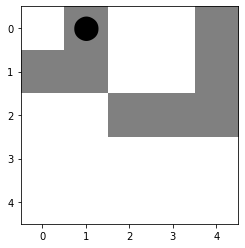

current position: [0, 1]
percepts: bumpers={'north': True, 'south': False, 'west': False, 'east': False}, dirty=True
agent's action:  suck
dirty squares left: 7
-------------------------------------------------- 

step: 3


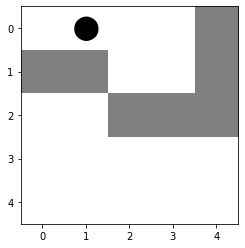

current position: [0, 1]
percepts: bumpers={'north': True, 'south': False, 'west': False, 'east': False}, dirty=False
agent's action:  west
dirty squares left: 7
-------------------------------------------------- 

step: 4


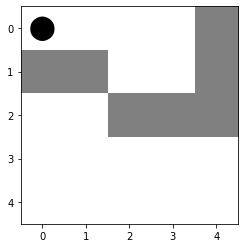

current position: [0, 0]
percepts: bumpers={'north': True, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 7
-------------------------------------------------- 

step: 5


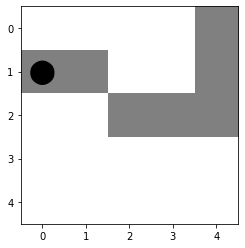

current position: [1, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=True
agent's action:  suck
dirty squares left: 6
-------------------------------------------------- 

step: 6


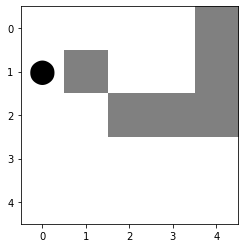

current position: [1, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 6
-------------------------------------------------- 

step: 7


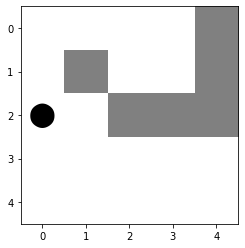

current position: [2, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  north
dirty squares left: 6
-------------------------------------------------- 

step: 8


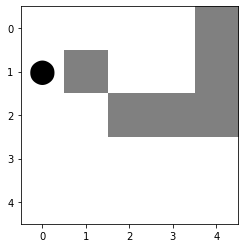

current position: [1, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  north
dirty squares left: 6
-------------------------------------------------- 

step: 9


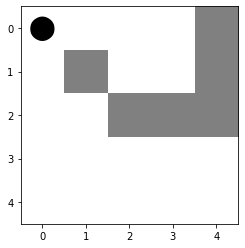

current position: [0, 0]
percepts: bumpers={'north': True, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 6
-------------------------------------------------- 

step: 10


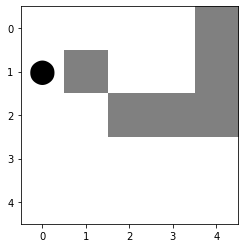

current position: [1, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
agent's action:  south
dirty squares left: 6


10

In [11]:
def simple_reflex_agent(bumpers, dirty):
    if(dirty) : return("suck")
    
    directions = [direction for (direction, blocked) in bumpers.items() if not blocked]
    return random.choice(directions)

vacuum_environment(simple_reflex_agent, maxsteps = 10)

steps for first 10 runs: [49, 106, 134, 76, 77, 82, 95, 110, 66, 187]
mean steps: 97.48


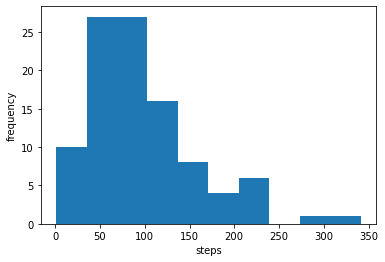

In [12]:
np.random.seed(1234)

N = 100 # simulation runs

steps = [ vacuum_environment(simple_reflex_agent, verb = False) for _ in range(N) ]

print("steps for first 10 runs:", steps[0:10])
print("mean steps:", np.mean(steps))

import matplotlib.pyplot as plt
plt.hist(steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

Conclusion: Reflexes improve the randomized agent by reducing the needed number of steps by on average 1/4.

## Task 3: Implement a model-based reflex agent 

This agent keeps track of the location and remembers where it has cleaned. It can use more advanced navigation.

**Simple depth-first implementation:**

The implementation explores the environment by 
1. keeping track of the current position and already visited squares.
2. Non-visited squares adjacent to the current position are aded to the fronter. 
3. It takes the most recently added square from the frontier stack and goes there. 

Notes: 
* I have not implemented navigating to the top-left corner.
* This **does not work with obstacles** and would need a search algorithm to find a path to a non-adjacent square!

In [13]:
class Model_based_reflex_agent:
    def __init__(self):
        # these variables form the agent's state
        self.frontier = list()
        self.visited = list()
        self.pos = [0,0]

    def act(self, bumpers, dirty):
        nav = { "north": [-1,0], "east": [0,1], "south": [1,0], "west": [0,-1] }
        directions = ["north", "east", "south", "west"]
        #directions = ["west", "south", "east", "north"]
    
        current_pos = self.pos
        self.visited.append(tuple(current_pos))
        if tuple(current_pos) in self.frontier: 
            self.frontier.remove(tuple(current_pos))
     
        print("Agent state:")
        print(f"  pos: {self.pos}")
        print(f"  visited: {self.visited}")
        print(f"  old frontier: {self.frontier}")

    
        if dirty: 
            return("suck")
        
        # expand frontier (note that I do not check if a position is already in the frontier. I deal with that above.)
        for direction in directions:
            new_pos = tuple(np.add(current_pos, nav[direction]))
            if not bumpers[direction] and not new_pos in self.visited:
                self.frontier.append(new_pos)
    
        print(f"  expanded frontier: {self.frontier}")
    
        # go to the square added to the frontier last (LIFO). **This square is adjacent if there are not obstacles.**
        goto_pos = self.frontier[-1]
        self.pos = goto_pos 
    
        print(f"  I want to go to: {goto_pos}")
    
        if goto_pos[0] < current_pos[0]: return("north")
        if goto_pos[0] > current_pos[0]: return("south")
        if goto_pos[1] > current_pos[1]: return("east")
        if goto_pos[1] < current_pos[1]: return("west")
    
        # this should not happen!
        return("error")    

room with 4 dirty squares:
[[False False False False False]
 [False False  True False  True]
 [False False False False False]
 [False False  True False  True]
 [False False False False False]]

start simulation
-------------------------------------------------- 

step: 1


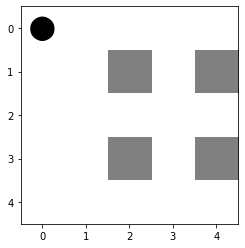

current position: [0, 0]
percepts: bumpers={'north': True, 'south': False, 'west': True, 'east': False}, dirty=False
Agent state:
  pos: [0, 0]
  visited: [(0, 0)]
  old frontier: []
  expanded frontier: [(0, 1), (1, 0)]
  I want to go to: (1, 0)
agent's action:  south
dirty squares left: 4
-------------------------------------------------- 

step: 2


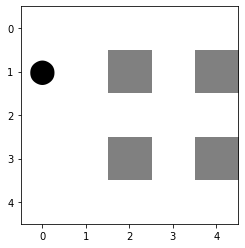

current position: [1, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
Agent state:
  pos: (1, 0)
  visited: [(0, 0), (1, 0)]
  old frontier: [(0, 1)]
  expanded frontier: [(0, 1), (1, 1), (2, 0)]
  I want to go to: (2, 0)
agent's action:  south
dirty squares left: 4
-------------------------------------------------- 

step: 3


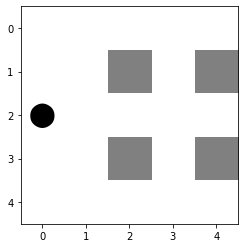

current position: [2, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
Agent state:
  pos: (2, 0)
  visited: [(0, 0), (1, 0), (2, 0)]
  old frontier: [(0, 1), (1, 1)]
  expanded frontier: [(0, 1), (1, 1), (2, 1), (3, 0)]
  I want to go to: (3, 0)
agent's action:  south
dirty squares left: 4
-------------------------------------------------- 

step: 4


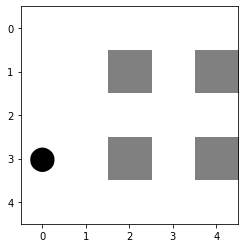

current position: [3, 0]
percepts: bumpers={'north': False, 'south': False, 'west': True, 'east': False}, dirty=False
Agent state:
  pos: (3, 0)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0)]
  old frontier: [(0, 1), (1, 1), (2, 1)]
  expanded frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 0)]
  I want to go to: (4, 0)
agent's action:  south
dirty squares left: 4
-------------------------------------------------- 

step: 5


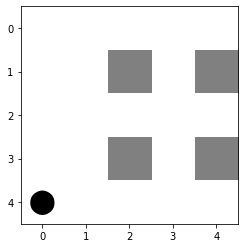

current position: [4, 0]
percepts: bumpers={'north': False, 'south': True, 'west': True, 'east': False}, dirty=False
Agent state:
  pos: (4, 0)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]
  old frontier: [(0, 1), (1, 1), (2, 1), (3, 1)]
  expanded frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]
  I want to go to: (4, 1)
agent's action:  east
dirty squares left: 4
-------------------------------------------------- 

step: 6


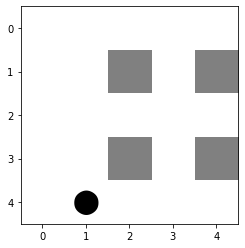

current position: [4, 1]
percepts: bumpers={'north': False, 'south': True, 'west': False, 'east': False}, dirty=False
Agent state:
  pos: (4, 1)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1)]
  old frontier: [(0, 1), (1, 1), (2, 1), (3, 1)]
  expanded frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (4, 2)]
  I want to go to: (4, 2)
agent's action:  east
dirty squares left: 4
-------------------------------------------------- 

step: 7


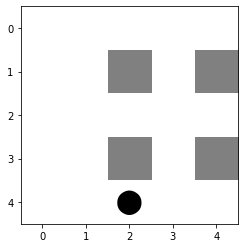

current position: [4, 2]
percepts: bumpers={'north': False, 'south': True, 'west': False, 'east': False}, dirty=False
Agent state:
  pos: (4, 2)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2)]
  old frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1)]
  expanded frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (3, 2), (4, 3)]
  I want to go to: (4, 3)
agent's action:  east
dirty squares left: 4
-------------------------------------------------- 

step: 8


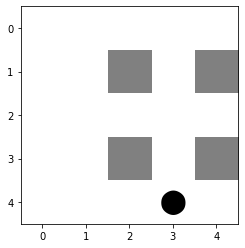

current position: [4, 3]
percepts: bumpers={'north': False, 'south': True, 'west': False, 'east': False}, dirty=False
Agent state:
  pos: (4, 3)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3)]
  old frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (3, 2)]
  expanded frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (3, 2), (3, 3), (4, 4)]
  I want to go to: (4, 4)
agent's action:  east
dirty squares left: 4
-------------------------------------------------- 

step: 9


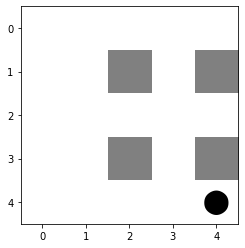

current position: [4, 4]
percepts: bumpers={'north': False, 'south': True, 'west': False, 'east': True}, dirty=False
Agent state:
  pos: (4, 4)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
  old frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (3, 2), (3, 3)]
  expanded frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (3, 2), (3, 3), (3, 4)]
  I want to go to: (3, 4)
agent's action:  north
dirty squares left: 4
-------------------------------------------------- 

step: 10


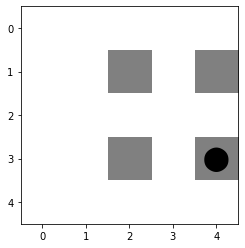

current position: [3, 4]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': True}, dirty=True
Agent state:
  pos: (3, 4)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4)]
  old frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (3, 2), (3, 3)]
agent's action:  suck
dirty squares left: 3
-------------------------------------------------- 

step: 11


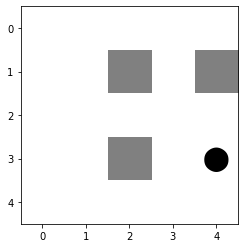

current position: [3, 4]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': True}, dirty=False
Agent state:
  pos: (3, 4)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4)]
  old frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (3, 2), (3, 3)]
  expanded frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (3, 2), (3, 3), (2, 4), (3, 3)]
  I want to go to: (3, 3)
agent's action:  west
dirty squares left: 3
-------------------------------------------------- 

step: 12


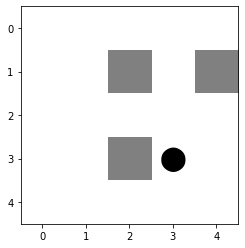

current position: [3, 3]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
Agent state:
  pos: (3, 3)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4), (3, 3)]
  old frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (3, 2), (2, 4), (3, 3)]
  expanded frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (3, 2), (2, 4), (3, 3), (2, 3), (3, 2)]
  I want to go to: (3, 2)
agent's action:  west
dirty squares left: 3
-------------------------------------------------- 

step: 13


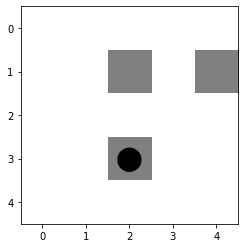

current position: [3, 2]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=True
Agent state:
  pos: (3, 2)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4), (3, 3), (3, 2)]
  old frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (2, 4), (3, 3), (2, 3), (3, 2)]
agent's action:  suck
dirty squares left: 2
-------------------------------------------------- 

step: 14


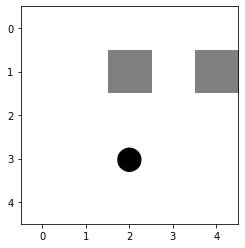

current position: [3, 2]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
Agent state:
  pos: (3, 2)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4), (3, 3), (3, 2), (3, 2)]
  old frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (2, 4), (3, 3), (2, 3)]
  expanded frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 1), (2, 4), (3, 3), (2, 3), (2, 2), (3, 1)]
  I want to go to: (3, 1)
agent's action:  west
dirty squares left: 2
-------------------------------------------------- 

step: 15


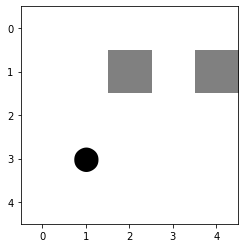

current position: [3, 1]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
Agent state:
  pos: (3, 1)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4), (3, 3), (3, 2), (3, 2), (3, 1)]
  old frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (2, 4), (3, 3), (2, 3), (2, 2), (3, 1)]
  expanded frontier: [(0, 1), (1, 1), (2, 1), (3, 1), (2, 4), (3, 3), (2, 3), (2, 2), (3, 1), (2, 1)]
  I want to go to: (2, 1)
agent's action:  north
dirty squares left: 2
-------------------------------------------------- 

step: 16


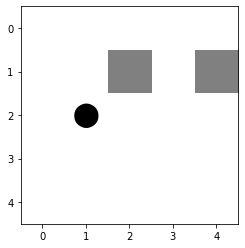

current position: [2, 1]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
Agent state:
  pos: (2, 1)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4), (3, 3), (3, 2), (3, 2), (3, 1), (2, 1)]
  old frontier: [(0, 1), (1, 1), (3, 1), (2, 4), (3, 3), (2, 3), (2, 2), (3, 1), (2, 1)]
  expanded frontier: [(0, 1), (1, 1), (3, 1), (2, 4), (3, 3), (2, 3), (2, 2), (3, 1), (2, 1), (1, 1), (2, 2)]
  I want to go to: (2, 2)
agent's action:  east
dirty squares left: 2
-------------------------------------------------- 

step: 17


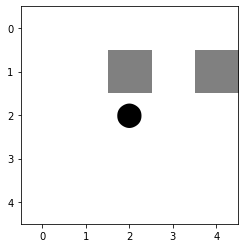

current position: [2, 2]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
Agent state:
  pos: (2, 2)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4), (3, 3), (3, 2), (3, 2), (3, 1), (2, 1), (2, 2)]
  old frontier: [(0, 1), (1, 1), (3, 1), (2, 4), (3, 3), (2, 3), (3, 1), (2, 1), (1, 1), (2, 2)]
  expanded frontier: [(0, 1), (1, 1), (3, 1), (2, 4), (3, 3), (2, 3), (3, 1), (2, 1), (1, 1), (2, 2), (1, 2), (2, 3)]
  I want to go to: (2, 3)
agent's action:  east
dirty squares left: 2
-------------------------------------------------- 

step: 18


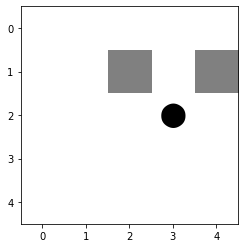

current position: [2, 3]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
Agent state:
  pos: (2, 3)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4), (3, 3), (3, 2), (3, 2), (3, 1), (2, 1), (2, 2), (2, 3)]
  old frontier: [(0, 1), (1, 1), (3, 1), (2, 4), (3, 3), (3, 1), (2, 1), (1, 1), (2, 2), (1, 2), (2, 3)]
  expanded frontier: [(0, 1), (1, 1), (3, 1), (2, 4), (3, 3), (3, 1), (2, 1), (1, 1), (2, 2), (1, 2), (2, 3), (1, 3), (2, 4)]
  I want to go to: (2, 4)
agent's action:  east
dirty squares left: 2
-------------------------------------------------- 

step: 19


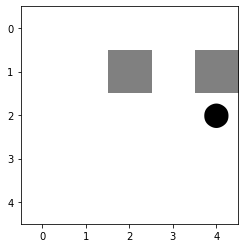

current position: [2, 4]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': True}, dirty=False
Agent state:
  pos: (2, 4)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4), (3, 3), (3, 2), (3, 2), (3, 1), (2, 1), (2, 2), (2, 3), (2, 4)]
  old frontier: [(0, 1), (1, 1), (3, 1), (3, 3), (3, 1), (2, 1), (1, 1), (2, 2), (1, 2), (2, 3), (1, 3), (2, 4)]
  expanded frontier: [(0, 1), (1, 1), (3, 1), (3, 3), (3, 1), (2, 1), (1, 1), (2, 2), (1, 2), (2, 3), (1, 3), (2, 4), (1, 4)]
  I want to go to: (1, 4)
agent's action:  north
dirty squares left: 2
-------------------------------------------------- 

step: 20


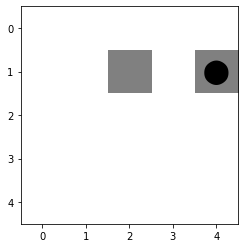

current position: [1, 4]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': True}, dirty=True
Agent state:
  pos: (1, 4)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4), (3, 3), (3, 2), (3, 2), (3, 1), (2, 1), (2, 2), (2, 3), (2, 4), (1, 4)]
  old frontier: [(0, 1), (1, 1), (3, 1), (3, 3), (3, 1), (2, 1), (1, 1), (2, 2), (1, 2), (2, 3), (1, 3), (2, 4)]
agent's action:  suck
dirty squares left: 1
-------------------------------------------------- 

step: 21


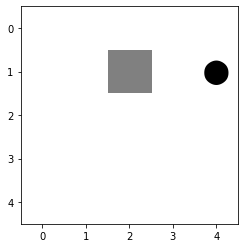

current position: [1, 4]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': True}, dirty=False
Agent state:
  pos: (1, 4)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4), (3, 3), (3, 2), (3, 2), (3, 1), (2, 1), (2, 2), (2, 3), (2, 4), (1, 4), (1, 4)]
  old frontier: [(0, 1), (1, 1), (3, 1), (3, 3), (3, 1), (2, 1), (1, 1), (2, 2), (1, 2), (2, 3), (1, 3), (2, 4)]
  expanded frontier: [(0, 1), (1, 1), (3, 1), (3, 3), (3, 1), (2, 1), (1, 1), (2, 2), (1, 2), (2, 3), (1, 3), (2, 4), (0, 4), (1, 3)]
  I want to go to: (1, 3)
agent's action:  west
dirty squares left: 1
-------------------------------------------------- 

step: 22


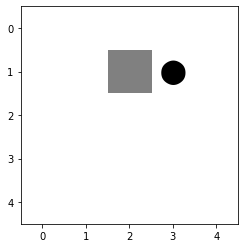

current position: [1, 3]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=False
Agent state:
  pos: (1, 3)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4), (3, 3), (3, 2), (3, 2), (3, 1), (2, 1), (2, 2), (2, 3), (2, 4), (1, 4), (1, 4), (1, 3)]
  old frontier: [(0, 1), (1, 1), (3, 1), (3, 3), (3, 1), (2, 1), (1, 1), (2, 2), (1, 2), (2, 3), (2, 4), (0, 4), (1, 3)]
  expanded frontier: [(0, 1), (1, 1), (3, 1), (3, 3), (3, 1), (2, 1), (1, 1), (2, 2), (1, 2), (2, 3), (2, 4), (0, 4), (1, 3), (0, 3), (1, 2)]
  I want to go to: (1, 2)
agent's action:  west
dirty squares left: 1
-------------------------------------------------- 

step: 23


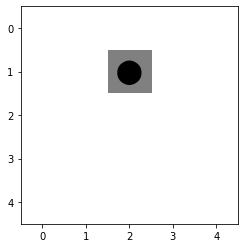

current position: [1, 2]
percepts: bumpers={'north': False, 'south': False, 'west': False, 'east': False}, dirty=True
Agent state:
  pos: (1, 2)
  visited: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (3, 4), (3, 3), (3, 2), (3, 2), (3, 1), (2, 1), (2, 2), (2, 3), (2, 4), (1, 4), (1, 4), (1, 3), (1, 2)]
  old frontier: [(0, 1), (1, 1), (3, 1), (3, 3), (3, 1), (2, 1), (1, 1), (2, 2), (2, 3), (2, 4), (0, 4), (1, 3), (0, 3), (1, 2)]
agent's action:  suck
dirty squares left: 0


23

In [14]:
my_model_based_reflex_agent = Model_based_reflex_agent()
vacuum_environment(my_model_based_reflex_agent.act, n = 5, verb = True, maxsteps = 1000)

## Task 4: Simulation study

Compare the performance of the agents using different size environments. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use at least 100 random runs for each.

In [15]:
def sim_runs(n, agent, N = 100):
    return [ vacuum_environment(agent, n = n, verb = False) for _ in range(N) ]

In [16]:
np.random.seed(1234)

runs = sim_runs(5, simple_reflex_agent)
np.mean(runs)

97.48

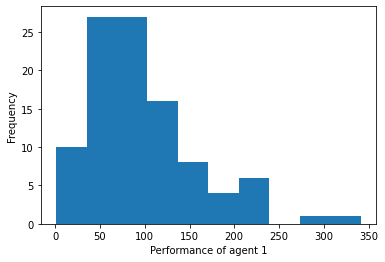

In [17]:
import matplotlib.pyplot as plt

plt.hist(runs)
plt.xlabel("Performance of agent 1")
plt.ylabel("Frequency")
plt.show()

__Note:__ The environment would need to reset the state of the model based agent every time we start new! I guess we could do this with an additional percept representing a reset button.

In [18]:
np.random.seed(1234)
    
ns = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
steps = np.repeat(0, len(ns))
for i in range(len(ns)):    
    steps[i] = np.mean(sim_runs(ns[i], simple_reflex_agent))

steps

array([   3,   16,   43,  103,  197,  280,  431,  628,  820, 1175, 1432,
       1819, 2202, 2811])

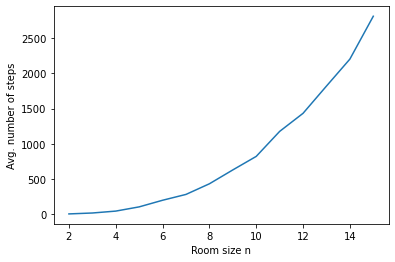

In [19]:
plt.plot(ns, steps)
plt.xlabel("Room size n")
plt.ylabel("Avg. number of steps")
plt.show()

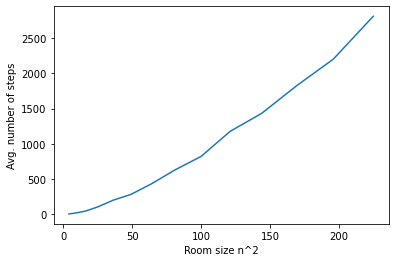

In [20]:
ns2 = np.square(ns)

plt.plot(ns2, steps)
plt.xlabel("Room size n^2")
plt.ylabel("Avg. number of steps")
plt.show()

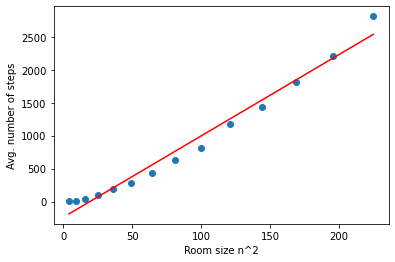

In [21]:
plt.scatter(ns2, steps)
plt.xlabel("Room size n^2")
plt.ylabel("Avg. number of steps")

from scipy import stats

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(ns2,steps)

line = slope*ns2+intercept
plt.plot(ns2, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#end

plt.show()

## Bonus tasks

* __Obstacles:__ Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. How does this change the performance?
* __Unknown environment with obstacles:__ The agent does not know how large the environment is, where it starts or where the obstacles are.
* __Utility-based agent:__ Change the environment, so each square has a fixed probability of getting dirty again. Give this information to the agent (as a 2-dimensional array of probabilities). Cleaning one dirty square produces the utility of 1. Implement a utility-based agent that maximizes the expected utility over a time horizon of 10000 time steps. This is very tricky!

In [22]:
# Your code goes here